# Predicting Cab Cancellation
This dataset is taken from the kaggle competetion https://inclass.kaggle.com/c/predicting-cab-booking-cancellations/data

In [1]:
# load packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib

# Setting the ast_node_interactivity to "all" will print
# each statement, not only the last one of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("data/Kaggle_YourCabs_training.csv")
df.head()
df.info()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

## Explanation to the different attributes

* **id** - booking ID
* **user_id** - the ID of the customer (based on mobile number)
* **vehicle_model_id** - vehicle model type.
* **package_id** - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
* **travel_type_id** - type of travel (1=long distance, 2= point to point, 3= hourly rental).
* **from_area_id** - unique identifier of area. Applicable only for point-to-point travel and packages
* **to_area_id** - unique identifier of area. Applicable only for point-to-point travel
* **from_city_id** - unique identifier of city
* **to_city_id** - unique identifier of city (only for intercity)
* **from_date** - time stamp of requested trip start
* **to_date** - time stamp of trip end
* **online_booking** - if booking was done on desktop website
* **mobile_site_booking** - if booking was done on mobile website
* **booking_created** - time stamp of booking
* **from_lat** - latitude of from area
* **from_long** -  longitude of from area
* **to_lat** - latitude of to area
* **to_long** - longitude of to area
* **Car_Cancellation** (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car.
* **Cost_of_error** (available only in training data) - the cost incurred if the booking is misclassified. For an un-cancelled booking, the cost of misclassificaiton is 1. For a cancelled booking, the cost is a function of the cancellation time relative to the trip start time (see Evaluation Page).



In [3]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


['seaborn-darkgrid', 'seaborn-bright', 'seaborn-talk', 'seaborn-dark', 'seaborn-muted', 'seaborn', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-colorblind', 'classic', 'ggplot', '_classic_test', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-ticks', 'seaborn-notebook', 'seaborn-white', 'seaborn-poster', 'dark_background', 'grayscale', 'seaborn-paper', 'bmh', 'fivethirtyeight']


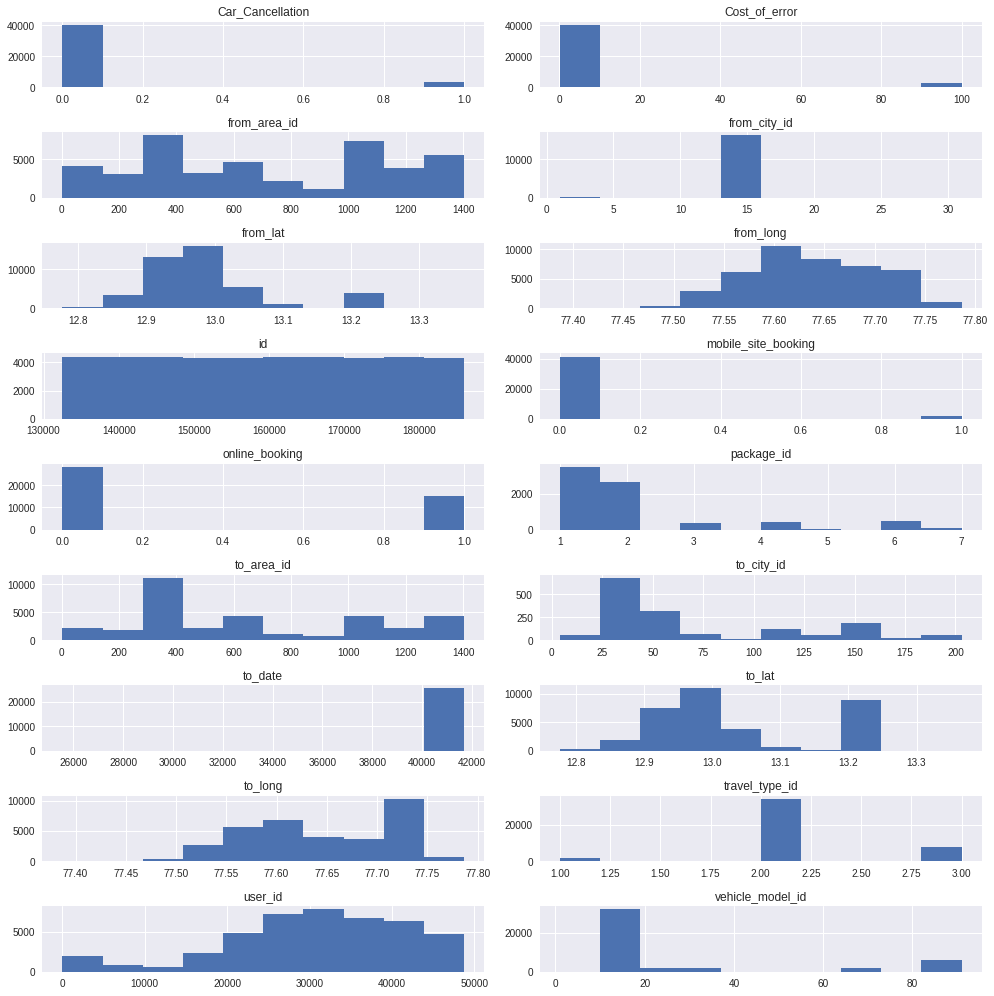

In [4]:
matplotlib.style.use('seaborn')
fig = df.hist(layout=(9,2), figsize=(14,14))
plt.tight_layout()
print(plt.style.available)
plt.show()

In [14]:
#sns.pairplot(vars=["one","two","three"], data=df, hue="key1", size=5)
#sns.pairplot(x_vars=["one"], y_vars=["two"], data=df, hue="key1", size=5)
data = df[["vehicle_model_id", "package_id", "Car_Cancellation"]].dropna()
#sns.pairplot(x_vars=["vehicle_model_id"], y_vars=["package_id"], data=df, hue="Car_Cancellation", size=5)
sns.pairplot(vars = ["package_id", "vehicle_model_id"], data=data, hue="Car_Cancellation", size=5)

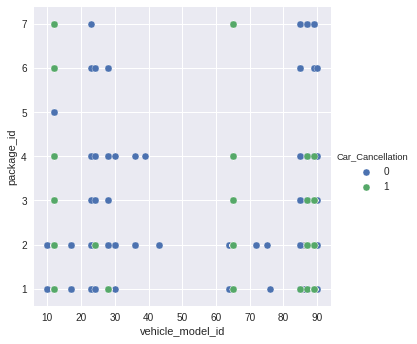

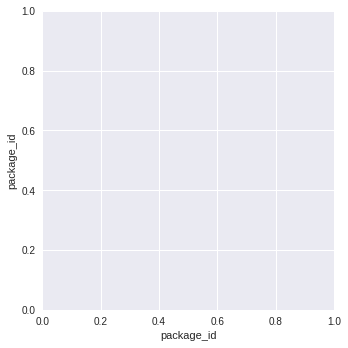

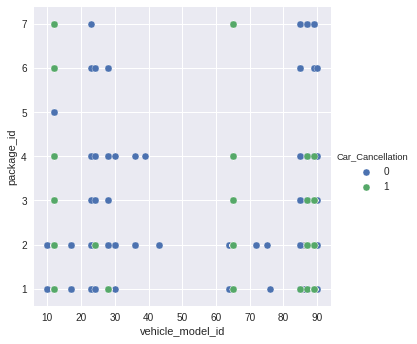

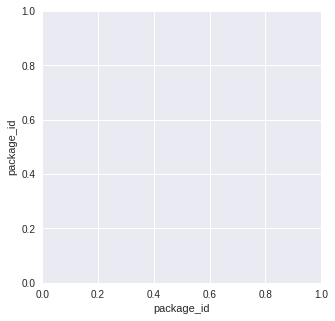

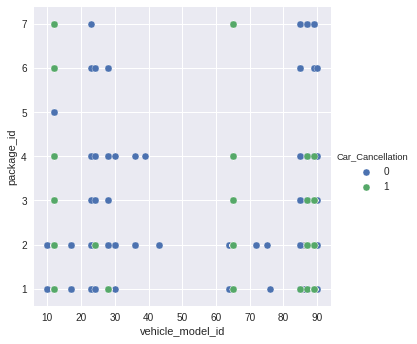

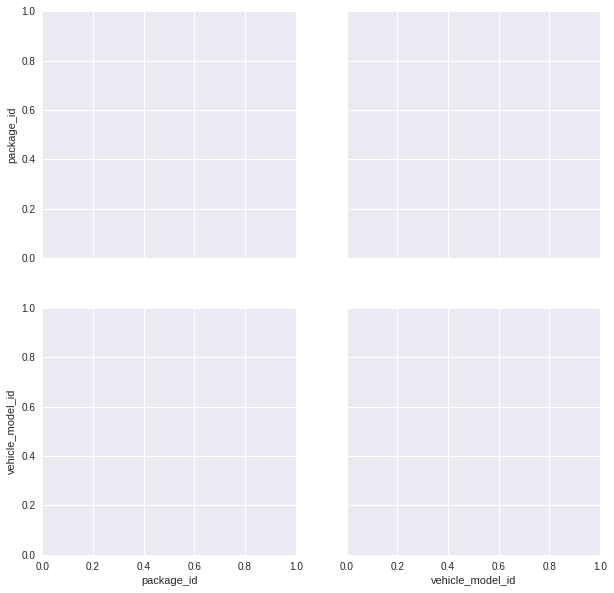

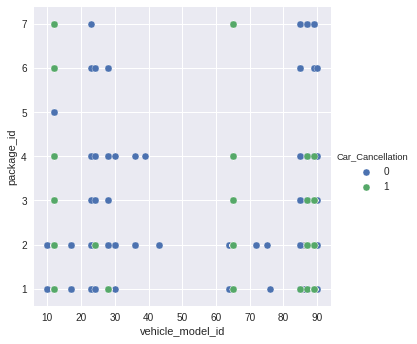

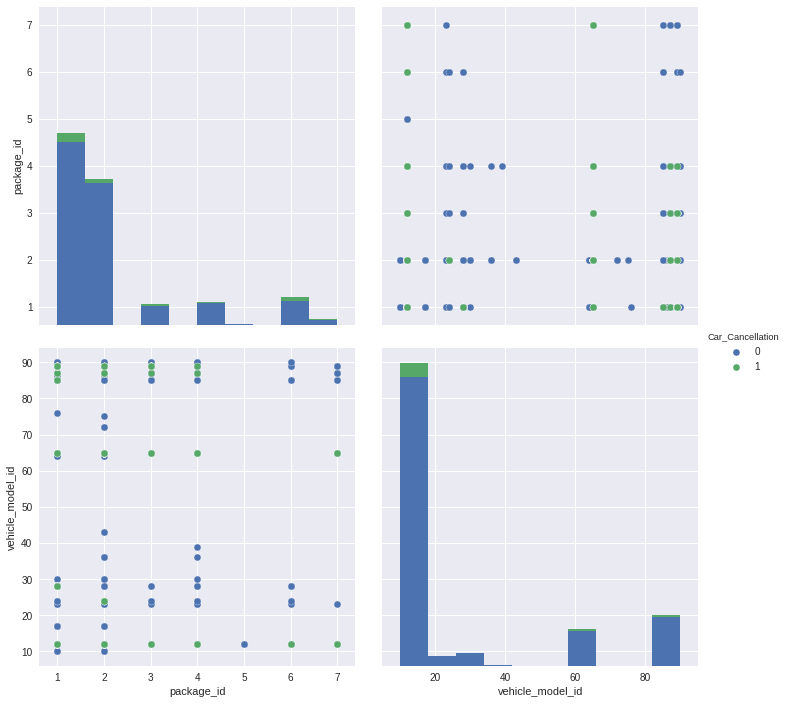

In [15]:
plt.show()

<bound method Artist.get_figure of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8f8058f5f8>>